In [44]:
import pandas as pd
import numpy as np
import time
import random
import sys
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [45]:
student_por_df = pd.read_csv('student-por.csv', sep=',')
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [46]:
student_por_df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [47]:
student_por_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [48]:
student_por_df.shape

(649, 33)

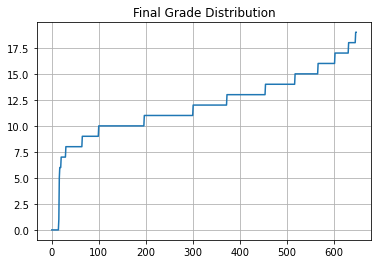

In [49]:
plt.plot(sorted(student_por_df['G3']))
plt.title('Final Grade Distribution')
plt.grid()

##### Exploration and feature engineering

In [50]:
list(student_por_df._get_numeric_data())

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [51]:
# find all non-numerical data
non_numeric_features = [feat for feat in list(student_por_df) if feat not in list(student_por_df._get_numeric_data())]

for feat in non_numeric_features:
    print(feat, ':', set(student_por_df[feat]))

school : {'MS', 'GP'}
sex : {'F', 'M'}
address : {'R', 'U'}
famsize : {'LE3', 'GT3'}
Pstatus : {'A', 'T'}
Mjob : {'health', 'services', 'at_home', 'teacher', 'other'}
Fjob : {'health', 'services', 'at_home', 'teacher', 'other'}
reason : {'reputation', 'home', 'other', 'course'}
guardian : {'mother', 'father', 'other'}
schoolsup : {'yes', 'no'}
famsup : {'yes', 'no'}
paid : {'yes', 'no'}
activities : {'yes', 'no'}
nursery : {'yes', 'no'}
higher : {'yes', 'no'}
internet : {'yes', 'no'}
romantic : {'yes', 'no'}


In [52]:
non_numeric_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [53]:
for feat in non_numeric_features:
    dummies = pd.get_dummies(student_por_df[feat]).rename(columns=lambda x: feat + '_' + str(x))
    student_por_df = pd.concat([student_por_df, dummies], axis=1)
    


In [79]:
student_por_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [80]:
student_por_df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [43]:
student_por_df = student_por_df[[feat for feat in list(student_por_df) if feat not in non_numeric_features]]
student_por_df.shape

(649, 59)

In [63]:
!pip install xgboost

In [64]:
# create an xgboost model
# run simple xgboost classification model and check 
# prep modeling code
outcome = 'G3'
features = [feat for feat in list(student_por_df) if feat not in outcome]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(student_por_df, 
                                                 student_por_df[outcome], 
                                                 test_size=0.3, 
                                                 random_state=42)


import xgboost  as xgb
xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train[features], y_train, feature_names = features)
dtest = xgb.DMatrix(X_test[features], y_test, feature_names = features)
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train (params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 2000,
              verbose_eval=50, 
              early_stopping_rounds = 500,
              evals=evals,
              #feval = f1_score_cust,
              maximize = False)
 

[12:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:11.64971	eval-rmse:11.94302
[50]	train-rmse:7.20058	eval-rmse:7.40624
[100]	train-rmse:4.50631	eval-rmse:4.63594
[150]	train-rmse:2.90725	eval-rmse:2.99138
[200]	train-rmse:1.98567	eval-rmse:2.06537
[250]	train-rmse:1.47358	eval-rmse:1.56771
[300]	train-rmse:1.20603	eval-rmse:1.32743
[350]	train-rmse:1.06527	eval-rmse:1.22792
[400]	train-rmse:0.98898	eval-rmse:1.19130
[450]	train-rmse:0.94039	eval-rmse:1.17599
[500]	train-rmse:0.90536	eval-rmse:1.16880
[550]	train-rmse:0.87610	eval-rmse:1.16890
[600]	train-rmse:0.85171	eval-rmse:1.17095
[650]	train-rmse:0.83189	eval-rmse:1.17157
[700]	train-rmse:0.81395	eval-rmse:1.17366
[750]	train-rmse:0.79626	eval-rmse:1.17288
[800]	train-rmse:0.77829	eval-rmse:1.17525
[850]	train-rmse:0.76304	eval-rmse:1.17549
[900]	train-rmse:0.74792	eval-rmse:1.17686
[950]	t

In [ ]:

# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [96]:
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, student_por_df[features], student_por_df[outcome], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.851 (0.119)


In [102]:


xg_reg = xgb.XGBRegressor(objective ='reg:linear',subsample=0.7, colsample_bytree = 0.7,learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 100,booster='gbtree')
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[17:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.451677


In [103]:
prediction=xg_reg.predict(X_test)
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, xg_reg.predict(X_train)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

R2 Value: 0.9885280076165147
Accuracy -inf


In [105]:
import pickle
# save the model to disk
filename = 'streamlit_student_grade_prediction.pkl'
pickle.dump(xg_reg, open(filename, 'wb'))

In [107]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9815509880898038


In [98]:
data_dmatrix = xgb.DMatrix(data=student_por_df[features],label=student_por_df[outcome])
params = {"objective":"reg:linear",'subsample': 0.7,'colsample_bytree': 0.7,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=2000,early_stopping_rounds=500,metrics="rmse", as_pandas=True, seed=0)

[17:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.712759,0.023825,10.714301,0.092915
1,9.711518,0.028907,9.714877,0.079400
2,8.799170,0.033182,8.808579,0.081317
3,7.970436,0.026711,7.985475,0.061136
4,7.231300,0.038652,7.239729,0.039952


In [100]:
print((cv_results["test-rmse-mean"]).tail(1))

61    1.314552
Name: test-rmse-mean, dtype: float64


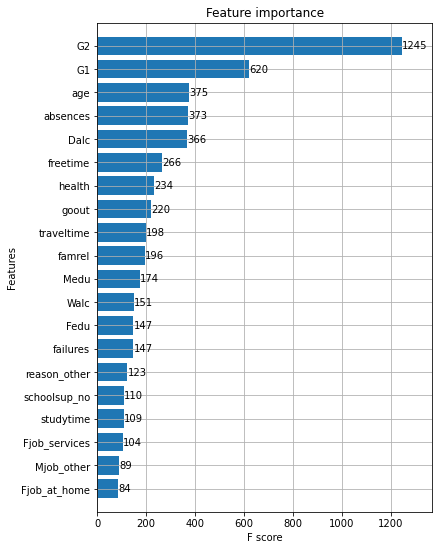

In [65]:
# find poor performing students and find out why they are so compared to their peers
# plot the important features  
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=0.8, ax=ax, max_num_features=20)

plt.show()

In [66]:
# get dataframe version of important feature for model 
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

,feature,importance
0,G2,1245
1,G1,620
11,age,375
8,absences,373
5,Dalc,366
15,freetime,266
13,health,234
29,goout,220
38,traveltime,198
10,famrel,196


In [67]:
print(xgb_model.predict(dtest)[0:10])

[16.81228  11.550355 17.011883 11.075317 11.513776 16.314234 17.202694
 10.227154 10.89279  10.709687]


In [68]:
key_features = list(xgb_fea_imp['feature'].values[0:40])
key_features

['G2',
 'G1',
 'age',
 'absences',
 'Dalc',
 'freetime',
 'health',
 'goout',
 'traveltime',
 'famrel',
 'Medu',
 'Walc',
 'Fedu',
 'failures',
 'reason_other',
 'schoolsup_no',
 'studytime',
 'Fjob_services',
 'Mjob_other',
 'Fjob_at_home',
 'sex_F',
 'famsup_no',
 'school_GP',
 'guardian_father',
 'romantic_no',
 'Mjob_services',
 'Mjob_teacher',
 'famsize_GT3',
 'higher_no',
 'nursery_no',
 'activities_no',
 'reason_reputation',
 'reason_home',
 'internet_no',
 'reason_course',
 'address_R',
 'schoolsup_yes',
 'paid_no',
 'guardian_mother',
 'school_MS']

In [69]:
# Take students with a predicted final score of less than 10 over 20
predicted_students_in_trouble = X_test[X_test['G3'] < 10]

# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    print('Student ID:', index)
    for feat in key_features:
        if row[feat] < student_por_df[feat].quantile(0.25):
            print('\t', 'Below:', feat, row[feat], 'Class:', 
                  np.round(np.mean(student_por_df[feat]),2))
        if row[feat] > student_por_df[feat].quantile(0.75):
            print('\t','Above:', feat, row[feat], 'Class:', 
                  np.round(np.mean(student_por_df[feat]),2))

Student ID: 131
	 Below: G2 9 Class: 11.57
	 Above: absences 10 Class: 3.66
	 Above: goout 5 Class: 3.18
	 Above: failures 3 Class: 0.22
	 Above: Mjob_services 1 Class: 0.21
	 Above: higher_no 1 Class: 0.11
	 Above: reason_reputation 1 Class: 0.22
Student ID: 81
	 Below: G2 9 Class: 11.57
	 Below: age 15 Class: 16.74
	 Below: schoolsup_no 0 Class: 0.9
	 Above: studytime 3 Class: 1.93
	 Above: nursery_no 1 Class: 0.2
	 Above: reason_home 1 Class: 0.23
	 Above: schoolsup_yes 1 Class: 0.1
Student ID: 585
	 Below: G2 7 Class: 11.57
	 Below: G1 8 Class: 11.4
	 Below: freetime 2 Class: 3.18
	 Above: studytime 3 Class: 1.93
	 Above: Fjob_at_home 1 Class: 0.06
	 Above: higher_no 1 Class: 0.11
	 Above: internet_no 1 Class: 0.23
	 Below: paid_no 0 Class: 0.94
Student ID: 177
	 Below: G2 8 Class: 11.57
	 Below: G1 9 Class: 11.4
	 Below: Medu 1 Class: 2.51
	 Above: Walc 4 Class: 2.28
	 Above: failures 1 Class: 0.22
	 Above: guardian_father 1 Class: 0.24
	 Above: higher_no 1 Class: 0.11
Student ID:

In [73]:
len(predicted_students_in_trouble)

26